In [2]:
import os
import numpy as np
import pandas as pd
import time
%matplotlib inline

In [3]:
train_data = pd.read_csv(os.path.join('data', 'titanic', 'train.csv'))

# Analysis on results

In [34]:
nn_out = pd.read_csv('data/titanic/result-nn.csv')
dt_out = pd.read_csv('data/titanic/result-decision-tree.csv')

In [83]:
out = pd.read_csv('data/titanic/test.csv')

In [84]:
out['Survived'] = dt_out['Survived']

In [85]:
out.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [86]:
(out.Survived==1).sum()

160

In [87]:
out[out.Survived==1].Sex.value_counts() / out.Sex.value_counts()

female    0.611842
male      0.251880
Name: Sex, dtype: float64

In [95]:
(out[out.Survived==1].Age < 18.0).value_counts() / (out.Age < 18.0).value_counts()

False    0.352785
True     0.658537
Name: Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

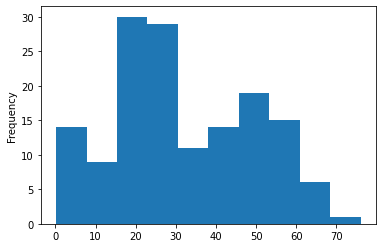

In [96]:
out[out.Survived==1].Age.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

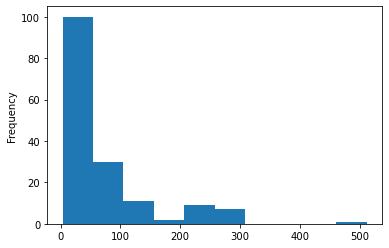

In [97]:
out[out.Survived==1].Fare.plot(kind='hist')

In [100]:
out['Family Size'] = out.Parch + out.SibSp
out['Family Size'] = out['Family Size'].apply(lambda x: 0 if x==0 else (1 if 1<=x<=2 else (2 if 3<=x<=5 else 3)))
out[out.Survived==1]['Family Size'].value_counts() / out['Family Size'].value_counts()

0    0.272727
1    0.587786
2    0.583333
3         NaN
Name: Family Size, dtype: float64

In [101]:
(out[out.Survived==1]['Family Size'] == 0).sum()

69

In [102]:
out.Embarked = out.Embarked.apply(lambda x: 0 if x=='S' else (1 if x=='C' else (2 if x=='Q' else print(x))))
out[out.Survived==1].Embarked.value_counts() / out.Embarked.value_counts()

0    0.325926
1    0.617647
2    0.195652
Name: Embarked, dtype: float64

In [103]:
(out[out.Survived==1].Embarked == 0).sum(), (out[out.Survived==1].Embarked == 1).sum(), (out[out.Survived==1].Embarked == 2).sum()

(88, 63, 9)

<AxesSubplot:ylabel='Frequency'>

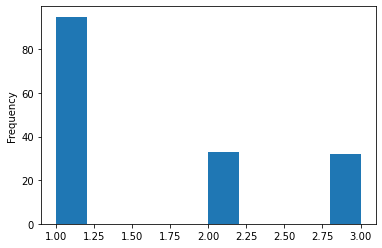

In [104]:
out[out.Survived==1].Pclass.plot(kind='hist')

In [105]:
(out[out.Survived==1].Pclass==3).sum()

32

In [106]:
for i in range(1, 4):
    print(i, (out[out.Survived==1].Pclass==i).sum(), (out.Pclass==i).sum(), (out[out.Survived==1].Pclass==i).sum()/(out.Pclass==i).sum())

1 95 107 0.8878504672897196
2 33 93 0.3548387096774194
3 32 218 0.14678899082568808


In [107]:
for i in range(3):
    print(i, (out[out.Survived==1].Embarked==i).sum(), (out.Embarked==i).sum(), (out[out.Survived==1].Embarked==i).sum()/(out.Embarked==i).sum())


0 88 270 0.32592592592592595
1 63 102 0.6176470588235294
2 9 46 0.1956521739130435


In [108]:
submission = pd.read_csv('data/titanic/test.csv')

In [109]:
submission['Survived'] = nn_out["Survived"]
submission.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [110]:
submission.to_csv('data/titanic/submission.csv', index=False)



In [113]:
submission.loc[:, ["Survived", "PassengerId"]].to_csv("final.csv", index=False)